In [1]:
%matplotlib inline

This notebook explores Dirichlet Distribution(DD), which is a shape distribution, or a distribution of distributions. Sampling a dirichlet yields a multinomial distribution .


* Suppose the multinomial(categorical) distribution contains K categories. The dirichlet distribution is then parameterized by $\boldsymbol G_0$ , which is basically a mean distribution of $\boldsymbol K$ categorical variables and a scale factor, $\boldsymbol\alpha_0$

* The variance of DD is a function of scale factor $\boldsymbol \alpha_0$

* The expected value of the DD is $G_0$. When $\alpha_0$ is large, samples from $DD(\alpha , G_0)$ will be close to $G_0$.


Let's try with different values of $G_0$ and $\alpha_0$




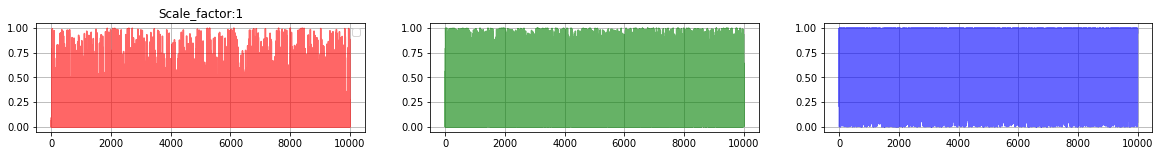

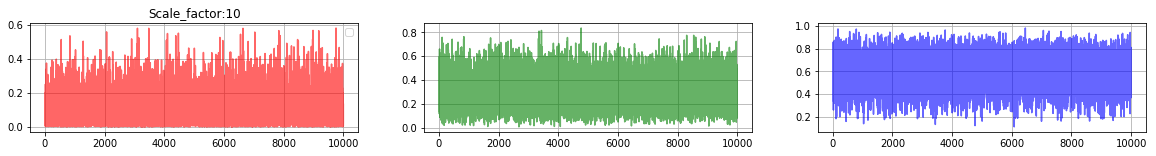

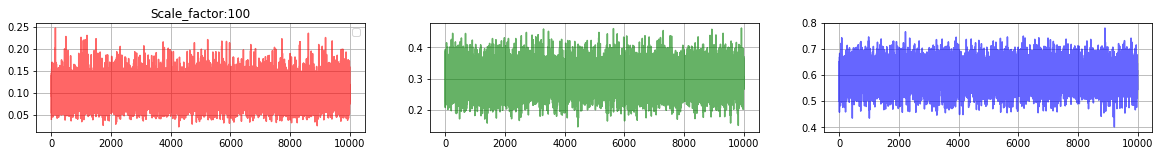

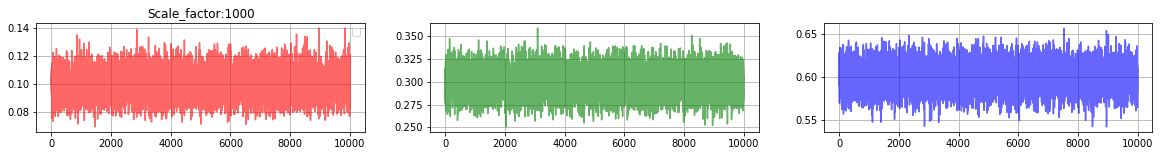

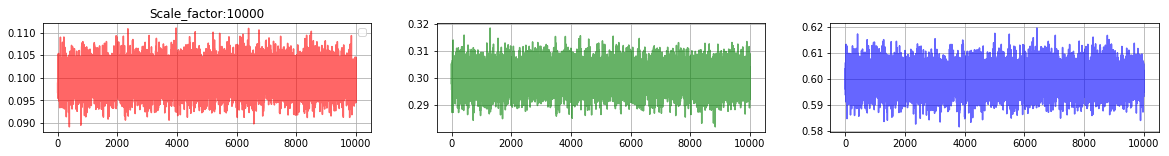

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet
np.set_printoptions(precision=1)


def dirSamplePlot(scale_factor,G0=[.1,.3,.6],N=10000):
    samples = dirichlet(alpha=scale_factor*np.array(G0)).rvs(N)
    x = np.array(range(N))
    plt.figure(figsize=(20,2))
    plt.subplot(1,3,1)
    plt.grid(True)
    plt.title('Scale_factor:'+str(scale_factor))
    plt.legend('legend')
    plt.plot(x,samples[:,0],color='r',alpha=0.6)
    plt.subplot(1,3,2)
    plt.grid(True)
    plt.plot(x,samples[:,1],color='g',alpha=0.6)
    plt.subplot(1,3,3)
    plt.grid(True)
    plt.plot(x,samples[:,2],color='b',alpha=0.6)
    
for scale in [ 1, 10, 100, 1000,10000]:
    dirSamplePlot(scale)


## Dirichlet Process (DP)

* Dirichlet process is a generic representation of Dirichlet distribution. In the above case we have seen that the distribution is parameterized by a <u>discrete</u> distribution($\boldsymbol G_0$). In Dirichlet process, the parameterization is done by a <u>generic</u> distribution $H_0$ and will generate samples similiar to $H_0$.

* We can construct a sample H, from a DP($\alpha , H_0$) by drawing a countably infinite number of samples $\theta_k$ from $H_0$ and setting :

$$\boldsymbol {H = \sum^{\infty}_{k=1} \pi_k . \delta (x-\theta_k)}$$ 

* where  $\boldsymbol \pi_k$ denotes carefully chosen weights, that sum to 1 and $\boldsymbol \delta$ dirac delta function